In [4]:
import sys

sys.path.append("../")

In [5]:
from typing import Callable

def time_it(f: Callable, *args) -> tuple[float, ...]:
    start = time.time()
    res = f(*args)
    ellapsed_time = time.time() - start
    return ellapsed_time, res

In [6]:
import matrix_ops as mo
import numpy as np
import time
import matplotlib.pyplot as plt

sizes = [pow(2, i) for i in range(11)]

LU_time = []
LU_diff = []
LU_pivoting_time = []
LU_pivoting_diff = []

for size in sizes:
    print(f"Calculating for matrix size {size}")
    mat = mo.createRandomMatrix(size, size)

    res_LU, mat_LU = time_it(mo.LU, mat)
    LU_time.append(res_LU)

    res_LU_pivoting, mat_LU_pivoting = time_it(mo.LU_pivoting, mat)
    LU_pivoting_time.append(res_LU_pivoting)


    assert np.allclose(mo.matrixToNumpy(mat), mo.matrixToNumpy(mat_LU[0]) @ mo.matrixToNumpy(mat_LU[1])), "Matrices differ"
    assert np.allclose(mo.matrixToNumpy(mat), mo.matrixToNumpy(mat_LU_pivoting[0]) @ mo.matrixToNumpy(mat_LU_pivoting[1]) @ mo.matrixToNumpy(mat_LU_pivoting[2])), "Matrices differ"
    
    LU_diff.append(np.sum(np.abs(mo.matrixToNumpy(mat) - mo.matrixToNumpy(mat_LU[0]) @ mo.matrixToNumpy(mat_LU[1]))))
    LU_pivoting_diff.append(np.sum(np.abs(mo.matrixToNumpy(mat) - mo.matrixToNumpy(mat_LU_pivoting[0]) @ mo.matrixToNumpy(mat_LU_pivoting[1]) @ mo.matrixToNumpy(mat_LU_pivoting[2]))))


Calculating for matrix size 1
Calculating for matrix size 2
Calculating for matrix size 4
Calculating for matrix size 8
Calculating for matrix size 16
Calculating for matrix size 32
Calculating for matrix size 64
Calculating for matrix size 128
Calculating for matrix size 256
Calculating for matrix size 512
Calculating for matrix size 1024


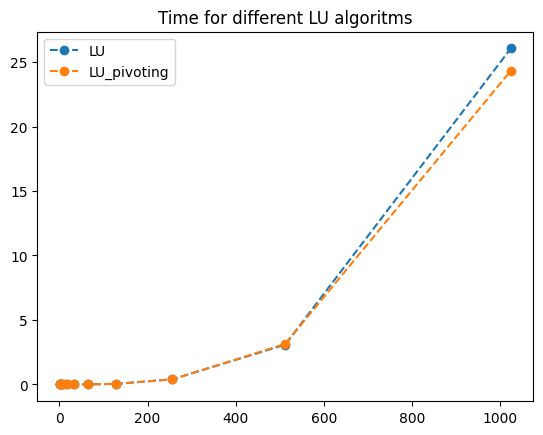

In [7]:
plt.plot(sizes, LU_time, label="LU", linestyle = "dashed", marker="o")
plt.plot(sizes, LU_pivoting_time, label="LU_pivoting", linestyle = "dashed", marker="o")

plt.title("Time for different LU algoritms")
plt.legend()
plt.show()

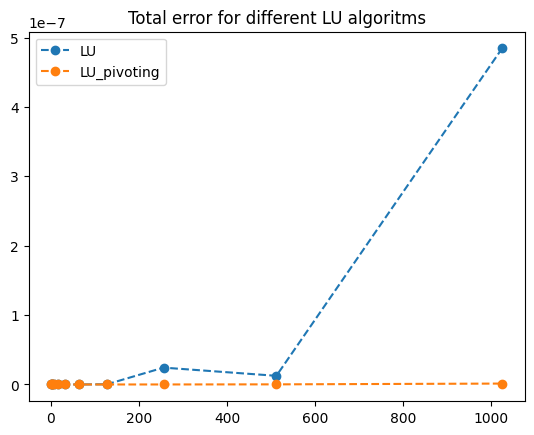

In [8]:
plt.plot(sizes, LU_diff, label="LU", linestyle = "dashed", marker="o")
plt.plot(sizes, LU_pivoting_diff, label="LU_pivoting", linestyle = "dashed", marker="o")

plt.title("Total error for different LU algoritms")
plt.legend()
plt.show()

In [13]:
gauss_time = []
gauss_diff = []
gauss_pivoting_time = []
gauss_pivoting_diff = []

sizes = [pow(2, i) for i in range(11)]

for size in sizes:
    print(f"Calculating for matrix size {size}")
    mat = mo.createRandomMatrix(size, size)
    vector = mo.createRandomMatrix(size, 1)

    res_gauss, mat_gauss = time_it(mo.gauss, mat, vector)
    gauss_time.append(res_gauss)

    res_gauss_pivoting, mat_gauss_pivoting = time_it(mo.gauss_pivoting, mat, vector)
    gauss_pivoting_time.append(res_gauss_pivoting)


    assert np.allclose(mo.matrixToNumpy(mat) @ mo.matrixToNumpy(mat_gauss), mo.matrixToNumpy(vector)), "Matrices differ"
    assert np.allclose(mo.matrixToNumpy(mat) @ mo.matrixToNumpy(mat_gauss), mo.matrixToNumpy(vector)), "Matrices differ"
    
    gauss_diff.append(np.sum(np.abs(mo.matrixToNumpy(mat) @ mo.matrixToNumpy(mat_gauss) - mo.matrixToNumpy(vector))))
    gauss_pivoting_diff.append(np.sum(np.abs(mo.matrixToNumpy(mat) @ mo.matrixToNumpy(mat_gauss_pivoting) - mo.matrixToNumpy(vector))))

Calculating for matrix size 1
Calculating for matrix size 2
Calculating for matrix size 4
Calculating for matrix size 8
Calculating for matrix size 16
Calculating for matrix size 32
Calculating for matrix size 64
Calculating for matrix size 128
Calculating for matrix size 256
Calculating for matrix size 512
Calculating for matrix size 1024


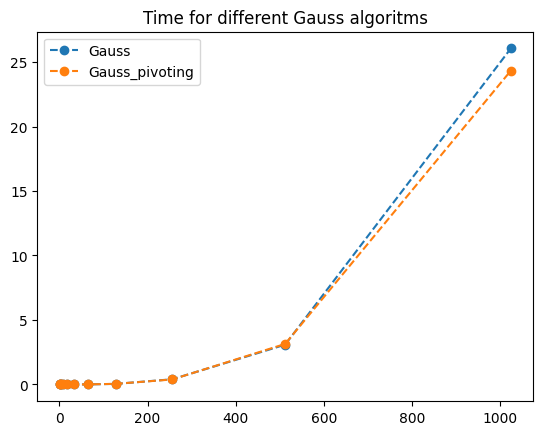

In [14]:
plt.plot(sizes, LU_time, label="Gauss", linestyle = "dashed", marker="o")
plt.plot(sizes, LU_pivoting_time, label="Gauss_pivoting", linestyle = "dashed", marker="o")

plt.title("Time for different Gauss algoritms")
plt.legend()
plt.show()

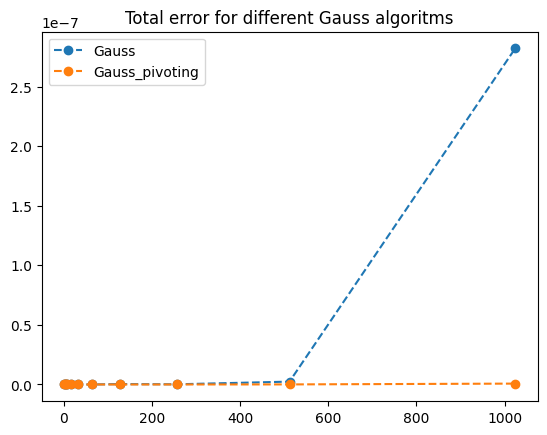

In [15]:
plt.plot(sizes, gauss_diff, label="Gauss", linestyle = "dashed", marker="o")
plt.plot(sizes, gauss_pivoting_diff, label="Gauss_pivoting", linestyle = "dashed", marker="o")

plt.title("Total error for different Gauss algoritms")
plt.legend()
plt.show()